In [2]:
import pandas as pd 


In [12]:
df=pd.read_csv("C:\PrimeBatch\AlgoPractice\Logistic Regression\data\processed_data\processed_data.csv")

In [13]:
# Copy Processed Data
patient_data=df.copy()


In [15]:
patient_data.isnull().value_counts()

id     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
False  False      False        False         False           False      False            False             False           False                False          False                   False      False       False         False    False          False           False         False              False        False                 False         False          False            False       False             False              False            False                 False           False               

In [27]:
#train_test_split
X=patient_data.drop(["diagnosis"],axis=1)
y=patient_data["diagnosis"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(max_iter=1000))
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
print("accuracy_score :",accuracy_score(y_test,y_pred))
print("precision_score :",precision_score(y_test,y_pred))
print("recall_score :",recall_score(y_test,y_pred))
print("f1_score :",f1_score(y_test,y_pred))
print("confusion_matrix :",confusion_matrix(y_test,y_pred))



accuracy_score : 0.9736842105263158
precision_score : 0.9761904761904762
recall_score : 0.9534883720930233
f1_score : 0.9647058823529412
confusion_matrix : [[70  1]
 [ 2 41]]


In [34]:
y_prob=pipe.predict_proba(X_test)[:,1]
y_prob

array([1.11076872e-01, 9.99990768e-01, 9.96796578e-01, 4.57729523e-04,
       4.97283208e-05, 1.00000000e+00, 9.99999999e-01, 9.63876002e-01,
       3.83190896e-01, 7.66113091e-04, 4.93857021e-02, 9.87174676e-01,
       6.06371549e-03, 8.40985571e-01, 1.88153808e-03, 9.99259017e-01,
       1.67745091e-03, 9.53340968e-06, 7.81050316e-07, 9.99998892e-01,
       8.73192331e-02, 9.21466316e-03, 9.99999996e-01, 8.06335924e-05,
       1.16991655e-03, 4.34616277e-04, 1.06639942e-03, 5.28111369e-03,
       2.87050578e-03, 9.99991726e-01, 5.47110494e-04, 1.43970906e-04,
       1.90316938e-03, 6.30075257e-03, 1.39233363e-04, 2.60586384e-03,
       9.42239803e-01, 2.89246508e-03, 9.99912134e-01, 4.80059494e-02,
       6.86841211e-05, 9.99573738e-01, 2.45505069e-03, 9.72438637e-04,
       1.63780580e-02, 7.20601120e-02, 3.25500933e-04, 4.70099755e-04,
       3.56296243e-02, 6.01263614e-04, 9.99880669e-01, 9.99999947e-01,
       3.19233211e-01, 1.12315620e-02, 2.37649920e-05, 3.83847713e-02,
      

In [71]:
threshold=0.4
y_pred_new=(y_prob>=threshold).astype(int)

In [ ]:
print("Cconfusion matrix :",confusion_matrix(y_test,y_pred_new))

[[70  1]
 [ 1 42]]


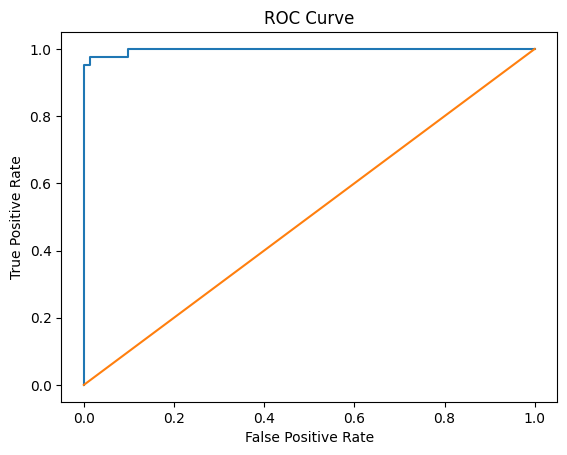

AUC Score: 0.99737962659679


In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", auc_score)


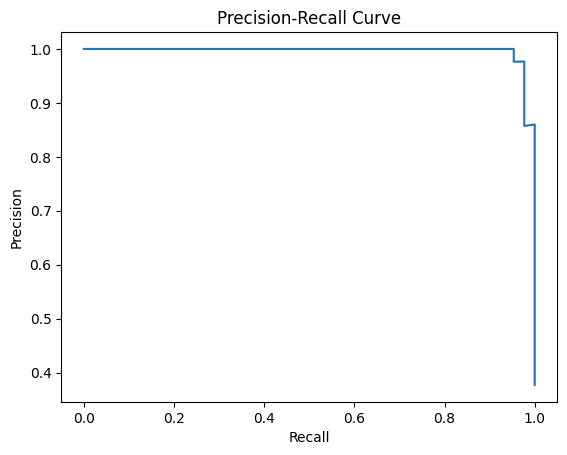

Average Precision: 0.9962033531638724


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
print("Average Precision:", ap_score)
